# In-class Homework for 5-state SA

In [18]:
%display typeset

In [19]:
P = Matrix([
    [1/3, 1/3, 0, 0, 1/3],
    [1/3, 1/3, 1/3, 0, 0],
    [0, 1/3, 1/3, 1/3, 0],
    [0, 0, 1/3, 1/3, 1/3],
    [1/3, 0, 0, 1/3, 1/3],
])

T = var("T")

A = Matrix([
    [1, exp(-1/T), 1, exp(-3/T), exp(-2/T)],
    [1, 1, 1, exp(-2/T), exp(-1/T)],
    [1, exp(-1/T), 1, exp(-3/T), exp(-2/T)],
    [1, 1, 1, 1, 1],
    [1, 1, 1, exp(-1/T), 1],
])

In [20]:
n = 5
Theta = Matrix([[P[i, j] * A[i, j] for j in range(n)] for i in range(n)])
for i in range(n):
    Theta[i, i] = 1 - sum([Theta[i, j] for j in range(n) if j != i])
Theta

[-1/3*e^(-1/T) - 1/3*e^(-2/T) + 1                     1/3*e^(-1/T)                                0                                0                     1/3*e^(-2/T)]
[                             1/3                              1/3                              1/3                                0                                0]
[                               0                     1/3*e^(-1/T) -1/3*e^(-1/T) - 1/3*e^(-3/T) + 1                     1/3*e^(-3/T)                                0]
[                               0                                0                              1/3                              1/3                              1/3]
[                             1/3                                0                                0                     1/3*e^(-1/T)              -1/3*e^(-1/T) + 2/3]

In [21]:
var("pi1 pi2 pi3 pi4 pi5")
pi = vector([pi1, pi2, pi3, pi4, pi5])
pi

(pi1, pi2, pi3, pi4, pi5)

In [33]:
piTheta = pi * Theta
[soln] = solve([
    pi1 == piTheta[0],
    pi2 == piTheta[1],
    pi3 == piTheta[2],
    pi4 == piTheta[3],
    pi5 == piTheta[4],
    1 == sum([pi1, pi2, pi3, pi4, pi5]),
], pi1, pi2, pi3, pi4, pi5)

soln

[pi1 == e^(3/T)/(2*e^(3/T) + e^(2/T) + e^(1/T) + 1),
 pi2 == e^(2/T)/(2*e^(3/T) + e^(2/T) + e^(1/T) + 1),
 pi3 == e^(3/T)/(2*e^(3/T) + e^(2/T) + e^(1/T) + 1),
 pi4 == (1/(2*e^(3/T) + e^(2/T) + e^(1/T) + 1)),
 pi5 == e^(1/T)/(2*e^(3/T) + e^(2/T) + e^(1/T) + 1)]

In [39]:
limit = [lim(component.rhs().simplify_full(), T = 0, dir='+') for component in soln]
limit

[1/2, 0, 1/2, 0, 0]

Need to make sure that you approach from the right since the limit wouldn't exist otherwise. That is, once you have $\pi(T)$, the limit you take is
$$ \lim_{T \to 0^+} \pi(T) $$

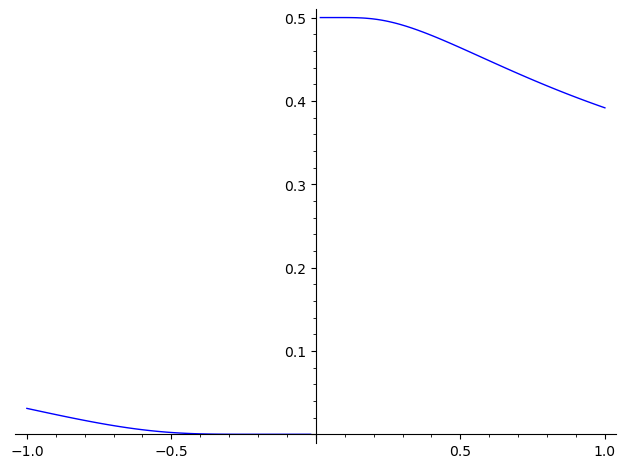

In [40]:
plot(soln[0].rhs())